# Example of constant stride image tiling

Here we use opencv to read image

In [1]:
import os
import sys
import cv2

package_root = os.path.abspath("..")
if package_root not in sys.path:
    sys.path.append(package_root)

In [2]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

from mpl_toolkits.axes_grid1 import ImageGrid

In [3]:
image_data = cv2.imread("test_image.jpg")
image_data = cv2.cvtColor(image_data, cv2.COLOR_BGR2RGB)

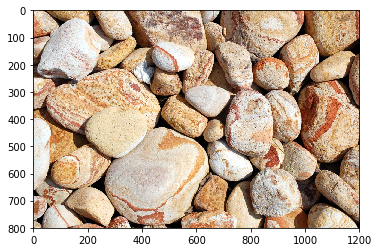

In [4]:
plt.figure(figsize=(12, 4))
plt.imshow(image_data)

In [5]:
from tiling import ConstStrideTiles

Let's define a method to read data from image

In [31]:
def read_data(data, x, y, w, h, out_w, out_h):
    im_h, im_w, im_c = data.shape
    tile = np.zeros((h, w, im_c), dtype=image_data.dtype)
    
    ys = max(y, 0)
    ye = min(y + h, im_h)
    xs = max(x, 0)
    xe = min(x + w, im_w)
    d = data[ys:ye, xs:xe, :]
    
    xs = 0 if x > 0 else -x
    ys = 0 if y > 0 else -y
    d_h, d_w, _ = d.shape
    tile[ys:ys + d_h, xs:xs + d_w, :] = d
            
    if (w, h) != out_size:
        tile = cv2.resize(tile, dsize=out_size)
    
    return tile

## Iterate over image with nodata

### Ovelapping tiles with a negative origin

Let's iterate over the input image with overlapping tiles of size 512x512 with stride of 256 pixels and start the tiling outside the image, from location (-100, -100)

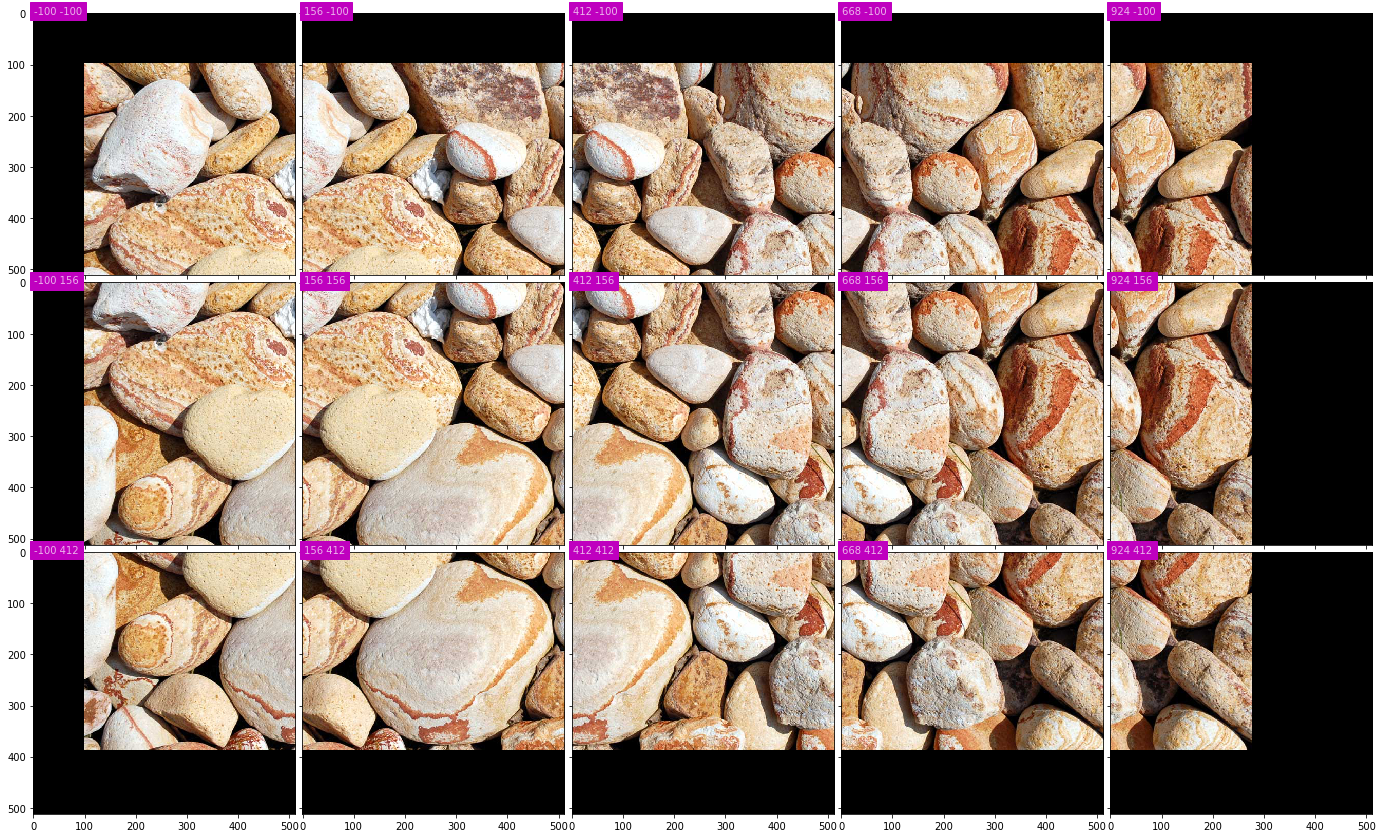

In [34]:
tiles = ConstStrideTiles(image_size=image_data.shape[:2][::-1], tile_size=512, stride=256, 
                         origin=(-100, -100),
                         scale=1.0,
                         include_nodata=True)

fig = plt.figure(figsize=(24,24))
grid = ImageGrid(fig, 111, nrows_ncols=(tiles.ny, tiles.nx), axes_pad=0.1)

for i, (extent, out_size) in enumerate(tiles):
    x, y, w, h = extent
    tile = read_data(image_data, x, y, w, h, out_size[0], out_size[1])
    ax = grid[i]
    im = ax.imshow(tile)
    ax.text(2, 2, '%i %i' % (x, y), color='w', backgroundcolor='m', alpha=0.7)
    ax.axis('on')

### Tiles without overlapping and origin

Let's iterate over the input image with tiles of size 300x300 with stride of tile size.

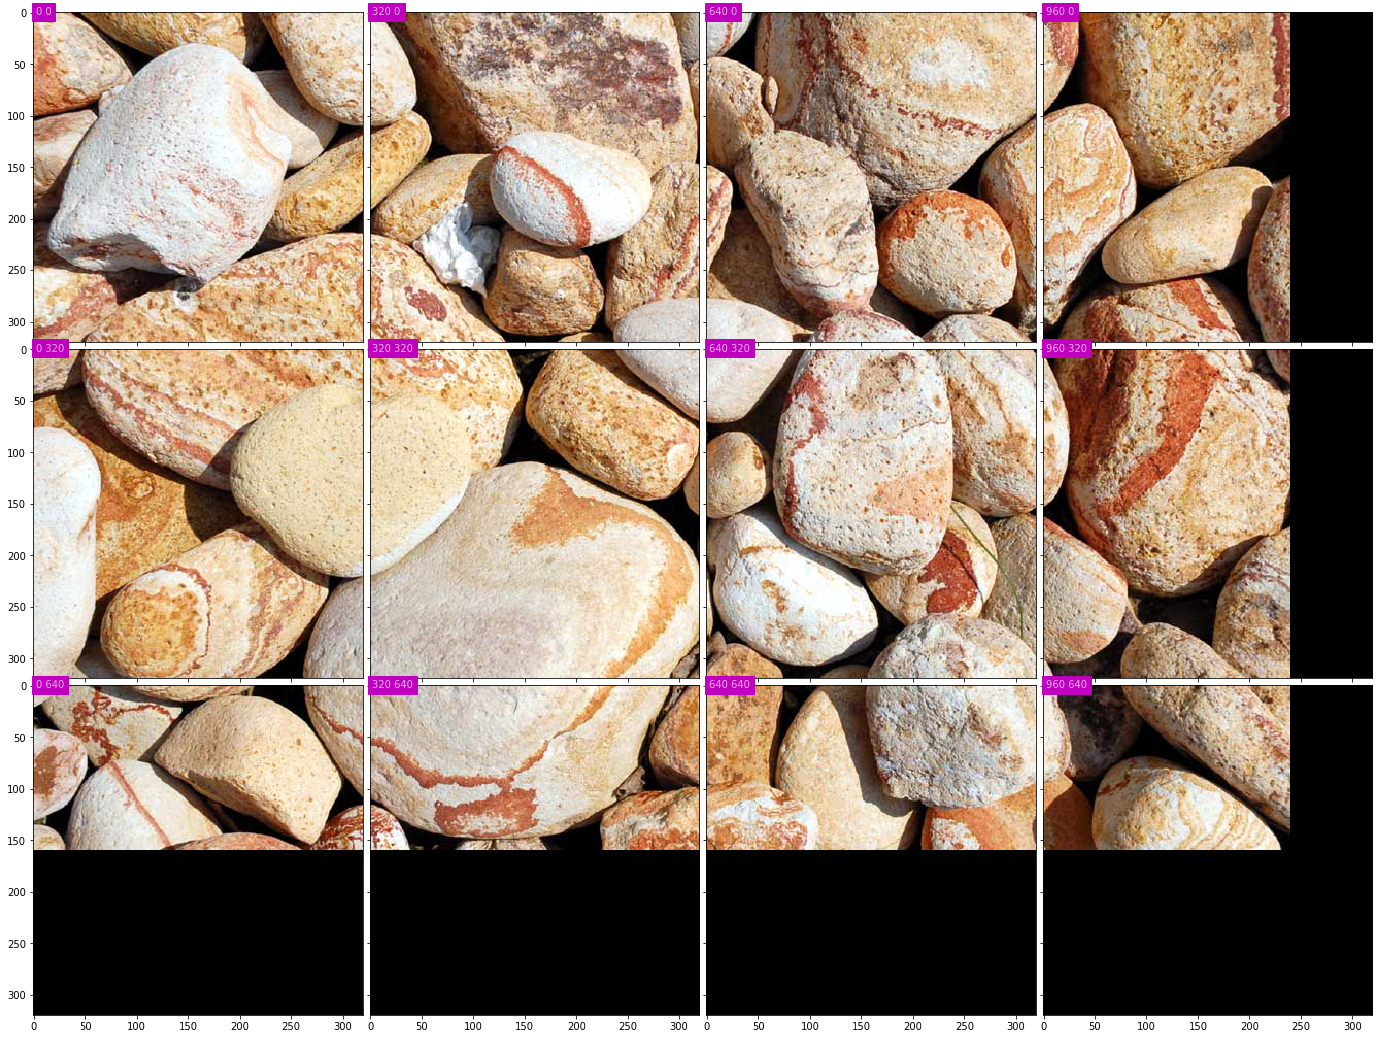

In [37]:
tiles = ConstStrideTiles(image_size=image_data.shape[:2][::-1], tile_size=320, stride=320, 
                         scale=1.0,
                         include_nodata=True)

fig = plt.figure(figsize=(24,24))
grid = ImageGrid(fig, 111, nrows_ncols=(tiles.ny, tiles.nx), axes_pad=0.1)

for i, (extent, out_size) in enumerate(tiles):
    x, y, w, h = extent
    tile = read_data(image_data, x, y, w, h, out_size[0], out_size[1])
    ax = grid[i]
    im = ax.imshow(tile)
    ax.text(2, 2, '%i %i' % (x, y), color='w', backgroundcolor='m', alpha=0.7)
    ax.axis('on')